## Agenda for day 4


---

1. API Introduction
    - Understanding Web Applications / Request - Response Protocols...
    - Understanding URLS
        - http://api.openweathermap.org/data/2.5/weather?APPID=1020334324&q=malaysia
        - https://www.xe.com/currencyconverter/convert/?Amount=1&From=EUR&To=SGD
    - Differentiate static vs dynamic vs API from URL
   
---
2. Http Web server
    - python -m http.server 8000
    
3. How to build an API with python (More for learning/understanding purpose...)
    - Flask API
 
---
4. Workshop solution

--- 
5. Extending the workshop to save info into Mongo db
    - pymongo
--- 
6. Optional
    - Installing selenium and chrome driver setup

## Quiz 1

In [ ]:
# "http://api.openweathermap.org/data/2.5/weather?APPID=8a81d247d650cb16469c4ba3ceb7d265&q=clementi"

# 1. Parse the url
# 2. Decide if its a website or an API
# 3. Type of the Resonse content

In [ ]:
https://api.openweathermap.org/data/2.5/weather?APPID=8a81d247d650cb16469c4ba3ceb7d265&q=clementi
    
https:// - scheme - protocol
    
    api.openweathermap.org - domain name
    138.201.197.100    :     443
    138.201.197.100
    192.168.3.113
    
    domain-name -> ip address --> bound to a machine

## Parsing url for understanding

In [ ]:
https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=USD,JPY,EUR
    
    
scheme: https
port:   443
domain: min-api.cryptocompare.com
ip :   40.115.22.134:443 
path-route : /data/price
Query param:
    1. fsym=BTC
    2. tsyms=USD,JPY,EUR

In [ ]:
https://www.xe.com/currencyconverter/convert/?Amount=1&From=EUR&To=SGD
    
scheme: https
port:   443
domain: www.xe.com
ip :   13.35.19.55:443
path-route : /currencyconverter/convert/
Query param: ?Amount=1&From=EUR&To=SGD 
    1. Amount=1
    2. From=EUR,
    3. To=SGD

In [ ]:
https://
    min-api.cryptocompare.com
    /data/price
    ?
    fsym=BTC
    &
    tsyms=USD,JPY,EUR

In [ ]:
https://
    www.xe.com - domain:443
    /currencyconverter/convert/
    ? - query parameter
    Amount=1
    &
    From=EUR
    &
    To=SGD #route

In [ ]:
# API server
# Req ------------------ Respose (JSON)

In [4]:
# parse the following...
# http://localhost:5000/calculator?a=10&b=20&ops=+
# http://localhost:5000/history?limit=5
# http://192.168.3.113:9000/<message>
# http://192.168.3.113:9000/<path>
# http://192.168.3.113:9000/<route>    
# http://192.168.3.113:9000/secret/password.json
# http://192.168.3.113:9000/hello.txt
# http://www.pythontutor.com/visualize.html#mode=edit

In [3]:


# local[192.168.3.113]                                     - remote-server[138.201.197.100]
# chrome                                                           - webserver (program) - port (443)
# terminal app                                                     - mail-server (program)
# chrome 1 (url) ---------------------------------------------------

In [5]:
# port ranges - [0 - 2^16]
#     - 0 - 1024 (well known ports)
    #     - ssh       - 22
    #     - mail-smpt -25
    #     - http      - 80
    #     - https     -443
#  - 1204 - (2^16)/2
    #     - application specific
    #     - mongodb - 27017

In [6]:
# ip - addr ranges
# public 
#     - ***
# private
#     - 192...
#     - 10....
#     - 172....
# localhost
#     - 127.0.0.1

## Workshop solution

In [ ]:
# code here
import time,csv,psutil
from datetime import datetime
SECONDS = 5

def collect_metrics(): 
    """ collect some cpu,mem: returns (cpu,mem,timestamp)"""
    cpu = psutil.cpu_percent()
    mem = psutil.virtual_memory().percent
    timestamp = str(datetime.now())
    return (cpu,mem,timestamp)

def save_metrics_to_csv(row):
    with open("cpu_mem.csv", mode="a", encoding="utf-8", newline="") as f:
        #f.write( f"{row[0]},{row[1]},{row[2]}\n" )
        csv_writer = csv.writer(f)
        csv_writer.writerow( row )  #(10.0, 47.0, '2020-01-09 11:12:29.653927')
    print("Saved ",row)

def check_if_the_file_has_header():
    with open("cpu_mem.csv") as f:
        if f.read().strip() == "": return False
        else:                      return True

if not check_if_the_file_has_header(): save_metrics_to_csv(["cpu","mem","timestamp"])
    
while True:
    try:
        row_tpl = collect_metrics() #(10.0, 47.0, '2020-01-09 11:12:29.653927')
        save_metrics_to_csv(row_tpl)
        time.sleep(SECONDS)
    except KeyboardInterrupt:
        print("Shutting down gracefully...")
        break

## Optinally, use a scheduler
`pip install schedule`

In [ ]:
# import schedule
# import time

# def job():
#     print("I'm working...")

# schedule.every(2).seconds.do(job)
# # schedule.every().hour.do(job)
# # schedule.every().day.at("10:30").do(job)
# # schedule.every().monday.do(job)
# # schedule.every().wednesday.at("13:15").do(job)
# # schedule.every().minute.at(":17").do(job)

# while True:
#     schedule.run_pending()
#     time.sleep(1)

## Test your Mongodb Installation

1. `pip install pymongo`
2. `pip install dnspython`

## https://api.mongodb.com/python/current/tutorial.html

## Insert Data into Mongodb with the following requirement

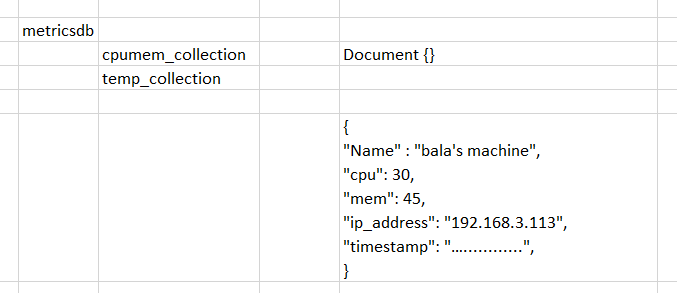

In [17]:
import psutil
from datetime import datetime

In [94]:
#code here...
from pymongo import MongoClient

# get the mongo client object
client = MongoClient("192.168.3.113:27017")
# get the database
db = client["metricsdb"]
# get the collection
cpumem_collection = db["cpumem_collection"]

# prepare the document to be saved to mongodb
doc = {
    "cpu": psutil.cpu_percent(),
    "mem": psutil.virtual_memory().percent,
    "name": "bala's machine",
    "ip_address": "192.168.3.113",
    "timestamp": str(datetime.now())
}
# insert the document into the database
cpumem_collection.insert_one( doc )

## Query the db

In [41]:
cpumem_collection.name

'cpumem_collection'

In [47]:
cpumem_collection.count_documents( {} )

2251

## Query exact match

In [62]:
rows = list(cpumem_collection.find({
    "name": "bala's machine"
}))

## Query with gt >

In [64]:
rows = list(cpumem_collection.find({"mem": {"$gt": 70}}))

## show rows in dataframe

In [68]:
import pandas as pd
rows = list(cpumem_collection.find())
df = pd.DataFrame(rows)
df.head()

,_id,cpu,ip address,ip_address,mem,name,timestamp,timestramp
0,5e16c4873b9b671fe0bd45f0,23.5,NaN,192.168.3.113,51.3,bala's machine,2020-01-09 14:13:27.152949,NaN
1,5e16c4b39fd177f755724302,1.7,NaN,192.168.3.98,48.6,bh's machine,2020-01-09 14:14:11.710962,NaN
2,5e16c4ce9cb62de6302a41b4,13.8,NaN,127.0.0.1,53.3,NaN,2020-01-09 14:14:38.122914,NaN
3,5e16c4cd6fe8ef21d5db36ec,10.8,NaN,192.168.3.113,45.8,jeryl's machine,2020-01-09 14:14:37.779777,NaN
4,5e16c4dc184685955f26b8f2,1.8,NaN,192.168.3.113,40.8,bala's machine,2020-01-09 14:14:52.162330,NaN


## Delete or Modify

In [73]:
cpumem_collection.delete_one({
    "_id": "5e16c4b39fd177f755724302"
})

## Delete many

In [83]:
cpumem_collection.delete_many({
    "name": "super mario"
})

## Delete records, which have name like "%machine%"

In [103]:
cpumem_collection.delete_many({
    "name": "/.*machine.*/"
})

## modify

In [110]:
cpumem_collection.find_and_modify( query={
    "name": "break"
}, update={
    "name":"okay, lets take a break"
})

C:\Users\balap\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: find_and_modify is deprecated, use find_one_and_delete, find_one_and_replace, or find_one_and_update instead
  after removing the cwd from sys.path.


{'_id': ObjectId('5e16cc4ff699b190a4e7e8cb'),
 'cpu': 5.7,
 'mem': 75.1,
 'name': 'break',
 'ip_address': '192.168.3.80',
 'timestamp': '2020-01-09 14:46:39.125260'}

In [111]:
df = pd.DataFrame(cpumem_collection.find())
df

,_id,cpu,ip_address,mem,name,timestamp,timestramp
0,5e16cb5977553b02ef6ed303,1.5,192.168.3.98,49.2,Super mehhhrio,2020-01-09 14:42:33.229522,NaN
1,5e16cbd88adbc411cf9cbf11,7.6,192.168.3.99,71.1,Test1,2020-01-09 14:18:15.295646,NaN
2,5e16cbd88adbc411cf9cbf12,7.6,192.168.3.99,70.9,Test2,2020-01-09 14:18:16.300664,NaN
3,5e16cbd88adbc411cf9cbf13,9.3,192.168.3.99,70.9,Test3,2020-01-09 14:18:17.304143,NaN
4,5e16cbd88adbc411cf9cbf14,3.9,192.168.3.99,70.7,Test4,2020-01-09 14:18:18.307416,NaN
5,5e16cbd88adbc411cf9cbf15,2.0,192.168.3.99,70.7,Test5,2020-01-09 14:18:19.310941,NaN
6,5e16cbd88adbc411cf9cbf16,2.7,192.168.3.99,70.7,Test6,2020-01-09 14:18:20.314422,NaN
7,5e16cbd88adbc411cf9cbf17,1.5,192.168.3.99,70.6,Test7,2020-01-09 14:18:21.319134,NaN
8,5e16cbd88adbc411cf9cbf18,5.1,192.168.3.99,70.8,Test8,2020-01-09 14:18:22.325234,NaN
9,5e16cbd88adbc411cf9cbf19,3.5,192.168.3.99,70.4,Test9,2020-01-09 14:18:23.330959,NaN


In [108]:
df.groupby("name")['name'].count()

name
FBI               14
Super mehhhrio     1
Test1              1
Test10             1
Test11             1
Test12             1
Test13             1
Test14             1
Test15             1
Test16             1
Test17             1
Test18             1
Test19             1
Test2              1
Test20             1
Test21             1
Test22             1
Test23             1
Test3              1
Test4              1
Test5              1
Test6              1
Test7              1
Test8              1
Test9              1
break              1
tau                1
Name: name, dtype: int64

# Snippet to connect and test your mongodb

In [117]:
from pymongo import MongoClient

In [118]:
client = MongoClient("localhost:27017")

In [119]:
db = client["mydb"]

In [120]:
# student_collection = db["students"]
person_collection = db["persons"]

In [124]:
f = open("C:/Users/balap/Documents/Persons.json")
import json
docs = (f.read())
# person_collection.insert_many(docs)
f.close()

In [127]:
# d = eval(docs)

In [12]:
student_collection.insert_one({
    "name": "bala",
    "contact": "90909090"
})

In [13]:
list(student_collection.find())

[{'_id': ObjectId('5e16b2f33b9b671fe0bd45e5'),
  'name': 'bala',
  'contact': '90909090'}]

## MongoDB Workshop

In [116]:
# Refer to workshop notebook

## Find all files in a folder - using `.glob()` from `pathlib.Path`

In [113]:
from pathlib import Path
folder = r"C:\Users\balap\Desktop\teaching\pydot27\Workshops\Workshop03\pyvideo_data-master\pyvideo_data-master\data-school"
folder = Path(folder)

In [114]:
# search for patten in a current directory
# pattern : *.json
list(folder.glob("*.json"))

[WindowsPath('C:/Users/balap/Desktop/teaching/pydot27/Workshops/Workshop03/pyvideo_data-master/pyvideo_data-master/data-school/category.json')]

In [115]:
# search for patten in a current directory + sub-directories
# pattern : **/*.json

len(list(folder.glob("**/*.json")))

40